In [1]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('carprices.csv')

In [48]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [5]:
df = df[['Car Model','Mileage','Age(yrs)','Sell Price($)']]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

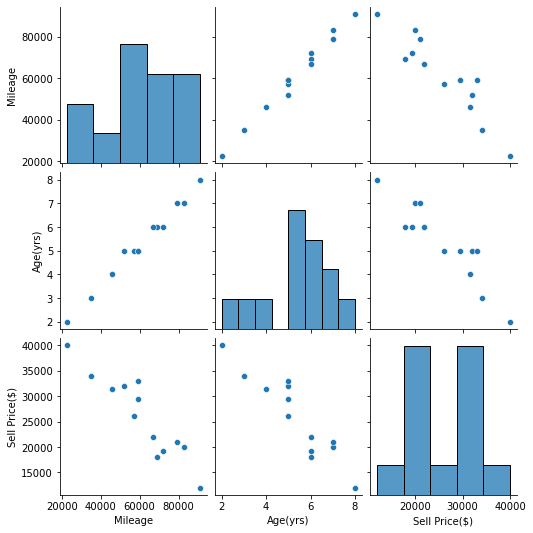

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df

,Car Model,Mileage,Age(yrs),Sell Price($)
0,1,69000,6,18000
1,1,35000,3,34000
2,1,57000,5,26100
3,1,22500,2,40000
4,1,46000,4,31500
5,0,59000,5,29400
6,0,52000,5,32000
7,0,72000,6,19300
8,0,91000,8,12000
9,2,67000,6,22000


In [22]:
dfle = df

In [23]:
dfle['Car Model'] = le.fit_transform(dfle['Car Model'].values)

In [26]:
dfle

,Car Model,Mileage,Age(yrs),Sell Price($)
0,1,69000,6,18000
1,1,35000,3,34000
2,1,57000,5,26100
3,1,22500,2,40000
4,1,46000,4,31500
5,0,59000,5,29400
6,0,52000,5,32000
7,0,72000,6,19300
8,0,91000,8,12000
9,2,67000,6,22000


In [29]:
X = dfle.drop('Sell Price($)', axis=1).values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [30]:
y = dfle['Sell Price($)'].values

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model',OneHotEncoder(),[0])], remainder = 'passthrough')

In [32]:
X = ct.fit_transform(X)

In [34]:
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [35]:
X = X[:,1:]

In [41]:
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [43]:
reg.fit(X,y)

LinearRegression()

In [44]:
reg.score(X,y)

0.9417050937281083

In [40]:
le.classes_

array(['Audi A5', 'BMW X5', 'Mercedez Benz C class'], dtype=object)

In [45]:
reg.predict([[0,1,45000,4]])

array([36991.31721062])

In [49]:
reg.predict([[1,0,86000,7]])

array([11080.74313219])